# Lab 7 Viral Infection Dynamics


> Yujia, Ethan, and Vincent adapted from materials developed by Diane and Elizabeth
> 
> 2024/5/9 and 5/10 (Week 8)

Edit this document directly. As you go through the notebooks you will find numbered questions. Please answer in the cells provided. 
   
This is an individual assignment, but you are allowed (encouraged!) to work together in groups and discuss coding and
answers. That said, you are responsible for all the material in this laboratory assignment. **DO NOT
COPY from anyone that you work with.** You are **NOT** allowed to share code. You need to write the code
and answer the questions yourself. Try the coding yourself first before seeking help.

<div class="alert alert-info" role="alert">

Please rename your notebook to `Lastname_Firstname_prelab#` and export it as HTML for submission

__Total Points 23 + 3 bonus points__

__Due: 5/16 Thursday 1:30 pm (week 9) if you attend Thursday Lab sessions or 5/17 Friday 1:30 pm if you attend Friday Lab sessions__ 
</div> 

If you have any questions, please do not hesitate to ask. You can find the emails and office hours of your instructors and TAs on Canvas. Best of luck!

Feel free to go to the Quantitative Biosciences Center for help! 
[https://college.uchicago.edu/academics/quantitative-biosciences-center](https://college.uchicago.edu/academics/quantitative-biosciences-center) 


<div class="alert alert-warning" role="warning">   
    
Total points = 23 + 3 bonus points

1.1 = 1'

1.2 = 2' Finding the closed-form solution for the nullclines 1'. Plotting 1'

1.3 = 1'

1.4 = 1'

1.5 = 3'

1.6 = 1' Identifying stability 0.5'. Distinguishing between clearance and persistence 0.5'

1.7 = 2'

2.1 = 3' 1' for each subplot

2.2 = 1'

3.1 = 1'

3.2 = 2' Use negative time span 1'. Correctly plot the stable manifolds 1'

3.3 = 2' Plot 1'. Answer 1'

3.4 = 2'

3.5 = 1'

3.6 = 3' (Bonus)
        
</div>   



In this lab we will walk you through how to reproduce a subset of the analysis found in
the paper by Baral et.al., [A dynamical motif comprising the interactions between antigens and CD8 T cells may underlie the outcomes of viral infections](https://www.pnas.org/doi/full/10.1073/pnas.1902178116) published in PNAS in 2019. 

The paper is on Canvas - please read it. Though __reading the paper is not necessary to answer any of the questions.__

The paper analyzes a minimal network motif that captures the interaction of __infected cells__ that present antigens with __CD8 T cells__ that destroy the infected cells. 
The interplay between infection and clearing of the infection presents the systems with __3 outcomes: 1) clearing the infection, 2) persisting infection, and 3) immunopathological mortality and/or tissue damage__.

There could be numerous factors that decide the outcomes of a viral infection, but in this paper Baral et al. argued that their motif
captures crucial aspects of a viral infection dynamics which is how it depends on the viral inoculum and effector CD8 T cell pool size.


## Part 1 Phase Portait of the Minimal Viral Infection Model

![The original 2D model](https://github.com/yuja-liu/bios20236_2024/blob/main/lab7/figs/2D_motif.png?raw=true)

(Baral et al. 2019 Fig. 1A)

The minimal model proposed by Baral et al. describes the interplay between infected cells and CD8 T cells:

$$
\begin{align}
\text{(infected cells)}\qquad \frac{dI}{dt} &= k_1I(1 - \frac{I}{I_{max}}) - k_2IE\\
\text{(CD8 response)}\qquad \frac{dE}{dt} &= k_3\frac{IE}{K_{p}+I} - k_4\frac{IE}{K_e + I}
\end{align}
$$

Notably, the infected cells are assumed to have pleiotropic effects on the CD8 T cells.
The antigens presented by the infected cells stimulate CD8 T cell activity.
However, if the infection persists, CD8 T cell activity is suppressed, a phenomenon known as _exhaustion_.

### Nondimensionalization

Nondimensionalization is a mathematical trick to _scale_ the state variables into a different unit.
By doing so some parameters can be _absorbed_ into the units which simplifies the model.
__Nondimensionalization is often your first step to approach a complex model__
(though in the lectures it was glossed over probably because we mainly deal with simple models).

To nondimensionalize the viral infection model, we want to scale both $I$ and $E$ by the carrying capacity of
infected cells, $I_{max}$.

Let $I' = I/I_{max}$ and $E' = E/I_{max}$. Devide both sides of the original equations by $I_{max}$, we have

$$
\begin{align}
\frac{dI'}{dt} &= k_1I'(1 - I') - k_2 I_{max}I'E'\\
\frac{dE'}{dt} &= k_3\frac{I'E'}{K_p/I_{max}+I'} - k_4\frac{I'E'}{K_e/I_{max} + I'}
\end{align}
$$

Then, let's redefine several of our parameters.
Let $k_2' = k_2\cdot I_{max}$, $K_p' = K_{p}/I_{max}$, and $K_e' = K_{e}/I_{max}$. Plug the new parameters in, we have

$$
\begin{align}
\frac{dI'}{dt} &= k_1I'(1 - I') - k_2'I'E'\\
\frac{dE'}{dt} &= k_3\frac{I'E'}{K_p'+I'} - k_4\frac{I'E'}{K_e' + I'}
\end{align}
$$

As you can see, the nondimensionalization effort absorbs the parameter $I_{max}$ in to the unit of the number of cells.
Finally, we can throw away the prime symbols if we don't mix use the new and old versions:

$$
\begin{align}
\frac{dI}{dt} &= k_1I(1 - I) - k_2IE\\
\frac{dE}{dt} &= k_3\frac{IE}{K_p + I} - k_4\frac{IE}{K_e + I}
\end{align}
$$

__All analysis in this lab will base on these nondimensionalized equations.__ Keep in mind that,
e.g., the new $I$ is the old $I$ divided by $I_{max}$.
In the paper Baral et al. made the scaling of the variables explicit.



Use these parameters as reported in the paper. They are the new versions and that's why some of them are scaled by $I_{max}$
(but you don't need $I_{max}$ in the right-hand side function, of course).

$$
\begin{gather}
I_{max} = 10^6\\
k_1 = 1.3\\
k_2 = I_{max}\cdot5\times10^{-5}\\
k_3 = 1\\
k_4 = 3\\
K_p = 10/I_{max}\\
K_e = 2\times10^5/I_{max}
\end{gather}
$$

You can conveniently write very big or very small numbers in Python with the __scientific notation__. The scientific notation
denotes numbers as multiples of a power of 10. E.g. You can write 0.005 as `5e-3` in Python.

__1.1 (1') Nullclines.__ Plot the $I$-nullcline in blue and the $E$-nullcline in green using `pyplot.contour`.

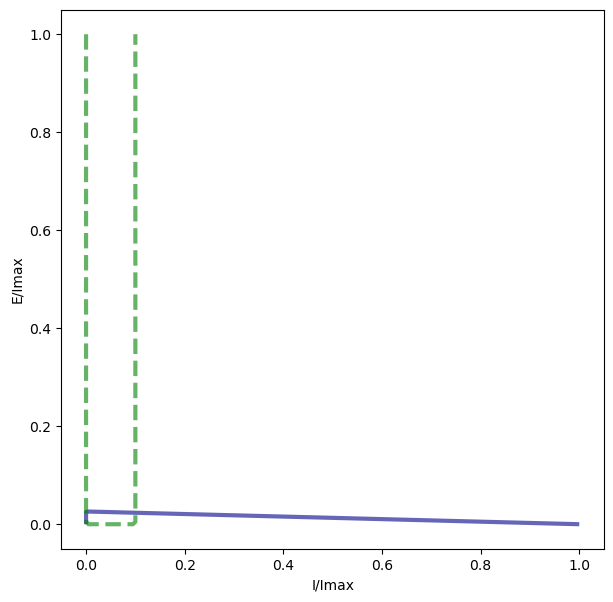

In [5]:
# your solution 1.1

import numpy as np
from matplotlib import pyplot as plt

def rhs(u, t, k1, k2, k3, k4, Kp, Ke):
    I, E = u
    dIdt = k1*I*(1 - I) - k2*I*E
    dEdt = k3*(I*E)/(Kp + I) - k4*(I*E)/(Ke + I)
    
    return dIdt, dEdt

# Parameters
Imax = 1e6
k1 = 1.3
k2 = Imax*5e-5
k3 = 1
k4 = 3

Kp = 10/Imax
Ke = 2e5/Imax

# Grid and field of derivatives
I_vec = np.linspace(0, 1, 201)
E_vec = np.linspace(0, 1, 201)
I, E = np.meshgrid(I_vec, E_vec)
dIdt, dEdt = rhs([I, E], None, k1, k2, k3, k4, Kp, Ke)


# Plot
p, ax = plt.subplots(figsize=(7, 7))

ax.contour(I, E, dIdt, [0], colors=["darkblue"], alpha=0.6, linewidths=[3])
ax.contour(I, E, dEdt, [0], colors=["green"], alpha=0.6, linewidths=[3], linestyles=["dashed"])

ax.set_xlabel("I/Imax")
ax.set_ylabel("E/Imax")
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
plt.show()

__1.2 (2') Actually correct nullclines.__ It is a common theme for tissue level networks to have nullclines overlapping with the axes.
In this case, the system admits multiple $I$-nullclines and multiple $E$-nullclines, which is challenging for `pyplot.contour` to draw.

Analytically solve the nullclines by setting $dI/dt = 0$ or $dE/dt = 0$.
Plot the nullclines from your closed-form solutions (hint: `pyplot.contour` plotted only a subset of the nullclines).

__A note on styles:__ Some nullclines may overlap. To help you see them, you can make some of the lines as dashed and/or
change the opacity by using the `alpha` argument when plotting.

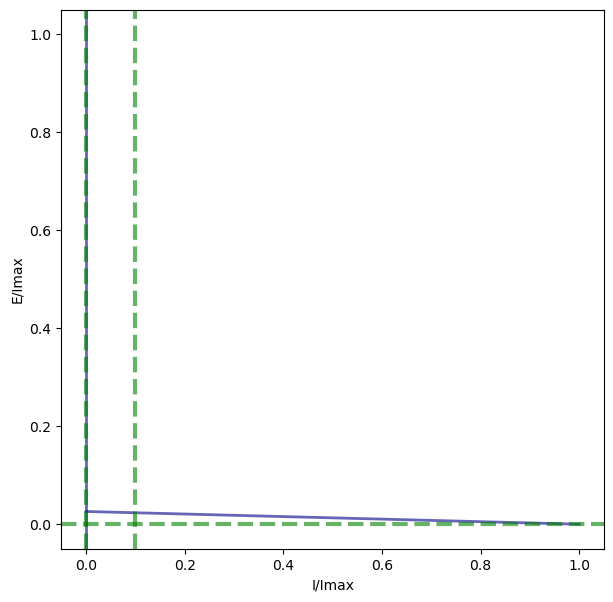

In [6]:
# your solution 1.2

p, ax = plt.subplots(figsize=(7, 7))

I_vec = np.linspace(0, 1, 201)
E_vec = np.linspace(0, 1, 201)

# I-nullclines
ax.plot(I_vec, k1/k2*(1 - I_vec), color="darkblue", alpha=0.6, linewidth=2)
ax.axvline(0, color="darkblue", alpha=0.6, linewidth=2)

# E-nullclines
ax.axvline(0, color="green", alpha = 0.6, linewidth=3, linestyle="dashed")
ax.axvline((k3*Ke - k4*Kp)/(k4 - k3), color="green", alpha=0.6, linewidth=3, linestyle="dashed")
ax.axhline(0, color="green", alpha = 0.6, linewidth=3, linestyle="dashed")

ax.set_xlabel("I/Imax")
ax.set_ylabel("E/Imax")
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
plt.show()

__1.3 (1')__ How many steady states are there? Qualitatively point out where they are.

__Edit this cell to include your answer__

Infinitely many. The steady states include a stable one at $(1, 0)$, a saddle point just above the horizontal axis, 
and the entire $I = 0$ and $E \ge 0$ axis.

If the student considers the $I = 0$ and $E \ge 0$ steady states as "one" and reports three steady states, that's also fine.

__1.4 (1') Plot in log scale.__ Much of the dynamics happens close to the axes. 
That's why we want to plot in a log scale to zoom in on the small numbers.

We can transform the horizontal axis to log scale by calling

```python
plt.xscale("log")
```

However, since we have nullcline(s) on $I = 0$ or $E = 0$ and since we cannot take the logarithm of 0,
we want to use a `symlog` scale instead.
A "symlog" scale stitches a linear scale in a small neighborhood around 0 and a logarithm scale everywhere else
(see [this example](https://matplotlib.org/stable/gallery/scales/symlog_demo.html)).
You can set the range of the linear scale by passing the `linthresh` argument.
E.g., to transform the horizontal axis to a symlog scale, call

```python
plt.xscale("symlog", linthresh=a small enough number)
```

A useful function to make plots in the log space is `np.logspace`, a cousin of `np.linspace`. 
The `logspace` function takes the start and the end position as 10-base exponents and returns
an array evenly spaced in the log scale.
E.g. to make an array comprising 0.001, 0.01, 0.1, 1, and 10, call

```python
np.logspace(-3, 1, 5)
```

Replot the nullclines in 1.2 and transform both axes to a symlog scale. Use range $-1\times10^{-7}$ to 2 for both axes.

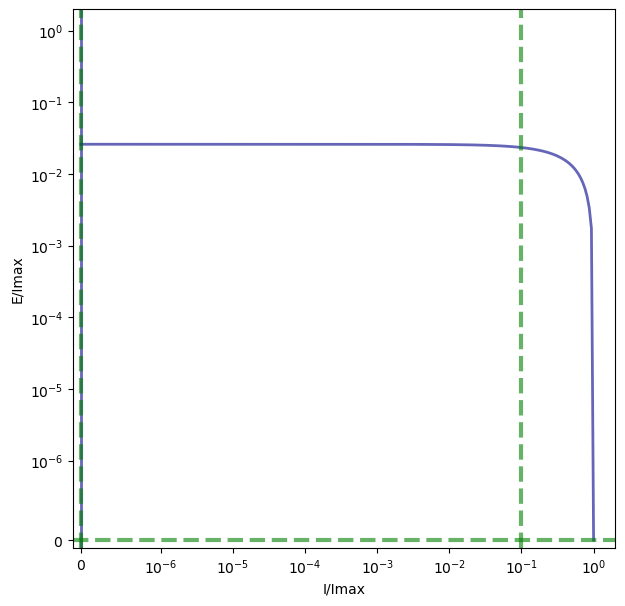

In [7]:
# your solution 1.4

p, ax = plt.subplots(figsize=(7, 7))

I_vec = np.concatenate([[0], np.logspace(-6, 0, 201)])
E_vec = np.concatenate([[0], np.logspace(-6, 0, 201)])

# I-nullclines
ax.plot(I_vec, k1/k2*(1 - I_vec), color="darkblue", alpha=0.6, linewidth=2)
ax.axvline(0, color="darkblue", alpha=0.6, linewidth=2)

# E-nullclines
ax.axvline(0, color="green", alpha = 0.6, linewidth=3, linestyle="dashed")
ax.axvline((k3*Ke - k4*Kp)/(k4 - k3), color="green", alpha=0.6, linewidth=3, linestyle="dashed")
ax.axhline(0, color="green", alpha = 0.6, linewidth=3, linestyle="dashed")

ax.set_xlabel("I/Imax")
ax.set_ylabel("E/Imax")
ax.set_xscale("symlog", linthresh=1e-6)
ax.set_yscale("symlog", linthresh=1e-6)
ax.set_xlim(-1e-7, 2)
ax.set_ylim(-1e-7, 2)
plt.show()

__1.5 (3') Stability of the steady states.__ To answer it, first solve trajectories from multiple (> 1) initial conditions.
Use a reasonable time span so that the trajectories settle at steady states but not for too long.

Here are some recommendations but feel free to try any initial condition you like
$$
(I_0, E_0) = (1e-6, 1e-5),\, (1e-6, 1e-4),\, (1e-6, 1.5e-5),\, (1e-6, 1e-3),\,
           (1e-5, 0.05),\, (1e-4, 1e-5),\, (1, 0.05),\, (1, 0.1)
           $$

Plot the trajectories in the phase plane as well as the time spaces.
Call the helper function below to construct the subplots. Additionally, use the arguments of `my_axes` to label the axes.

Overlay the nullclines from 1.4 in the phase plane. Use symlog scale for the I- and E-axis.

In [8]:
def my_axes(figsize=(9, 9), xlabel="[X]", ylabel="[Y]", tlabel="Time"):
    
    p, ax = plt.subplots(2, 2, figsize=figsize, gridspec_kw={'height_ratios': (3, 1),'width_ratios': (3, 1)},
                        sharex="col", sharey="row")

    # axis labels
    ax[0][0].set_xlabel("")
    ax[0][0].set_ylabel("")

    ax[0][1].set_ylabel(ylabel, rotation=0, labelpad=10.)
    ax[0][1].yaxis.set_label_position("right")
    ax[1][0].set_xlabel(xlabel)
    ax[0][1].set_xlabel(tlabel)
    ax[0][1].xaxis.set_label_position("top")
    ax[1][0].set_ylabel(tlabel)

    # invert time of the bottom graph
    ax[1][0].invert_yaxis()

    # nothing on the bottom right
    ax[1][1].axis("off")

    # orient the axes
    ax[0][0].tick_params(axis="x", labeltop=True, bottom=False, top=True)
    ax[0][1].tick_params(axis="x", labeltop=True, bottom=False, top=True)
    ax[0][1].tick_params(axis="y", labelright=True, left=False, right=True)

    # reduce padding
    p.subplots_adjust(wspace=0.1, hspace=0.1)

    return p, ax

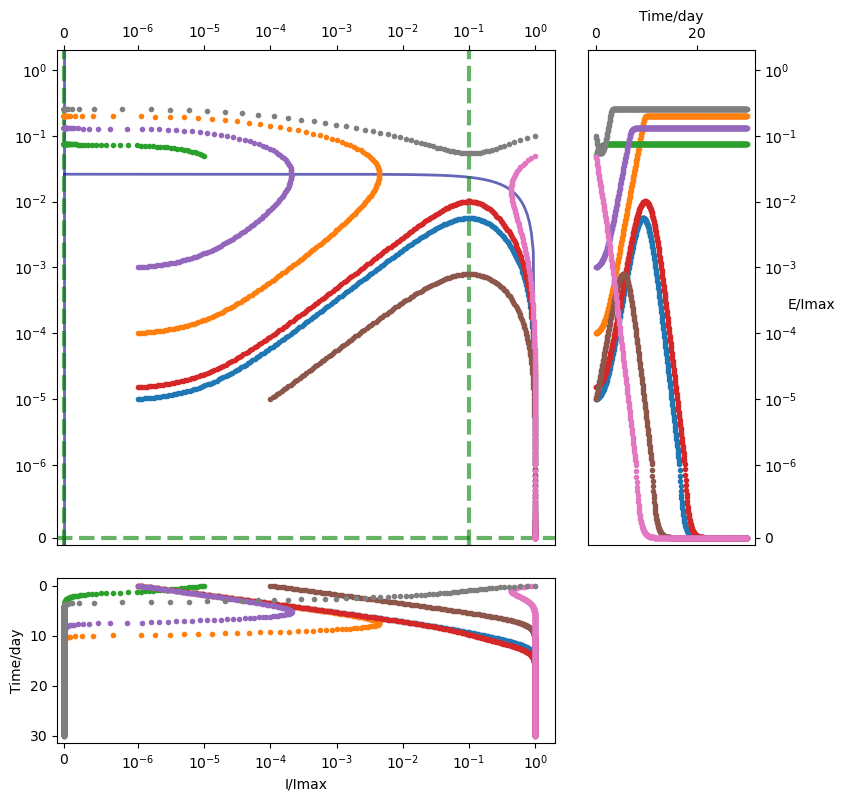

In [9]:
# your answer 1.5

from scipy.integrate import odeint

p, ax = my_axes(xlabel="I/Imax", ylabel="E/Imax", tlabel="Time/day")

I_vec = np.concatenate([[0], np.logspace(-6, 0, 201)])
E_vec = np.concatenate([[0], np.logspace(-6, 0, 201)])

# I-nullclines
ax[0][0].plot(I_vec, k1/k2*(1 - I_vec), color="darkblue", alpha=0.6, linewidth=2)
ax[0][0].axvline(0, color="darkblue", alpha=0.6, linewidth=2)

# E-nullclines
ax[0][0].axvline(0, color="green", alpha = 0.6, linewidth=3, linestyle="dashed")
ax[0][0].axvline((k3*Ke - k4*Kp)/(k4 - k3), color="green", alpha=0.6, linewidth=3, linestyle="dashed")
ax[0][0].axhline(0, color="green", alpha = 0.6, linewidth=3, linestyle="dashed")

# Trajectories
IE0_vec = [[1e-6, 1e-5],
           [1e-6, 1e-4],
           [1e-5, 0.05],
           [1e-6, 1.5e-5],
           [1e-6, 1e-3],
           [1e-4, 1e-5],
           [1, 0.05],
           [1, 0.1]]

tspan = np.linspace(0, 30, 501)

args = (k1, k2, k3, k4, Kp, Ke)

for u0 in IE0_vec:
    sol = odeint(rhs, u0, tspan, args)
    ax[0][0].plot(sol[:, 0], sol[:, 1], '.')
    ax[0][1].plot(tspan, sol[:, 1], '.')
    ax[1][0].plot(sol[:, 0], tspan, '.')

ax[0][0].set_xscale("symlog", linthresh=1e-6)
ax[0][0].set_yscale("symlog", linthresh=1e-6)
ax[0][0].set_xlim(-1e-7, 2)
ax[0][0].set_ylim(-1e-7, 2)
plt.show()

__1.6 (1')__ Quantitatively, where are the stable steady states? Among those, which represents clearance (i.e. no infected cells)
and which represents persistent infection?

__Edit this cell to include your answer__

$I = 0$ and $E \ge k_1/k_2$ are stable steady states that represent clearance (Lyapunov stable).

$(1, 0)$ is the stable steady state that represents viral persistence (Asymptotically stable).

__1.7 (2')__ Repeat 1.5 with initial conditions

$$
(I_0, E_0) = (1e-6, 1e-4),\,
          (1e-4, 1e-4),\,
          (1e-2, 1e-4)
          $$

Based on the steady states they reach, comment on how increasing viral inoculum changes the outcomes of infection.

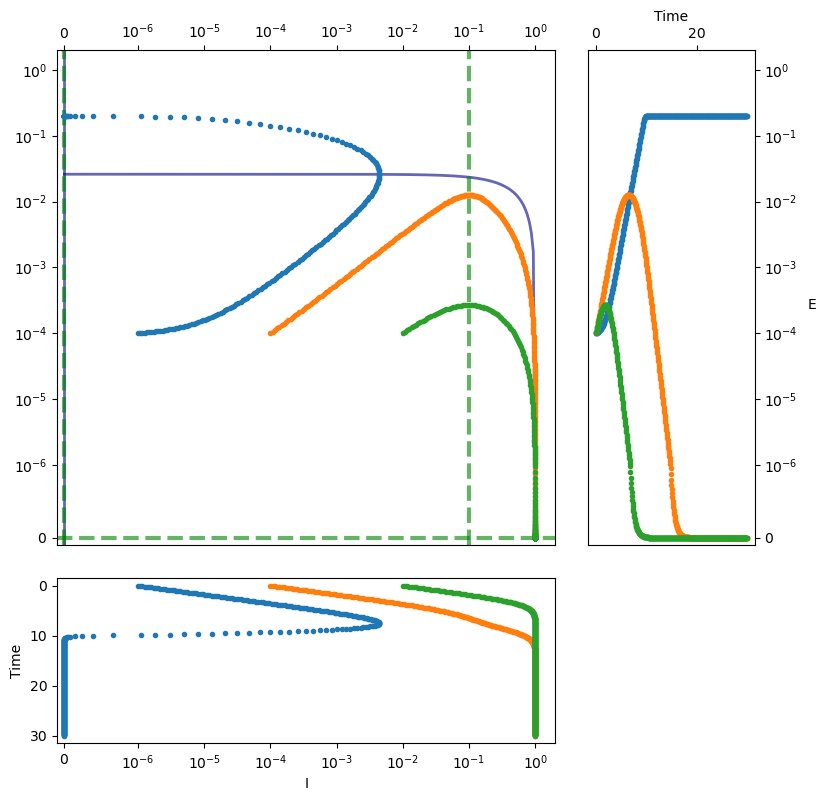

In [10]:
# your solution 1.7

from scipy.integrate import odeint

p, ax = my_axes(xlabel="I", ylabel="E")

I_vec = np.concatenate([[0], np.logspace(-6, 0, 201)])
E_vec = np.concatenate([[0], np.logspace(-6, 0, 201)])

# I-nullclines
ax[0][0].plot(I_vec, k1/k2*(1 - I_vec), color="darkblue", alpha=0.6, linewidth=2)
ax[0][0].axvline(0, color="darkblue", alpha=0.6, linewidth=2)

# E-nullclines
ax[0][0].axvline(0, color="green", alpha = 0.6, linewidth=3, linestyle="dashed")
ax[0][0].axvline((k3*Ke - k4*Kp)/(k4 - k3), color="green", alpha=0.6, linewidth=3, linestyle="dashed")
ax[0][0].axhline(0, color="green", alpha = 0.6, linewidth=3, linestyle="dashed")

# Trajectories
IE0_vec = [[1e-6, 1e-4],
          [1e-4, 1e-4],
          [1e-2, 1e-4]]

tspan = np.linspace(0, 30, 501)

args = (k1, k2, k3, k4, Kp, Ke)

for u0 in IE0_vec:
    sol = odeint(rhs, u0, tspan, args)
    ax[0][0].plot(sol[:, 0], sol[:, 1], '.')
    ax[0][1].plot(tspan, sol[:, 1], '.')
    ax[1][0].plot(sol[:, 0], tspan, '.')

ax[0][0].set_xscale("symlog", linthresh=1e-6)
ax[0][0].set_yscale("symlog", linthresh=1e-6)
ax[0][0].set_xlim(-1e-7, 2)
ax[0][0].set_ylim(-1e-7, 2)
plt.show()

__Edit this cell to include your answer__

As viral inoculum increases, the system transitions from clearance to persistent infection.

## Part 2 Exploring Immunopathology


__2.1 (3')__ First, make a new RHS function to include the dynamics of immunopathology, $P$.
$P$ has a 2nd-order production term meaning that immunopathology arises from the interation between infected cells and CD8 T cells.

$$
\frac{dP}{dt} = \alpha I E - d_c P
$$

As described in the paper, use parameter (here we have a new scaled version of $\alpha$)

$$
\begin{gather}
\alpha = I_{max}^2 \times10^{-8}\\
d_c = 1
\end{gather}
$$

Integrate from the same initial condition as 1.7. $P$ starts from 0. Plot the dynamics of
$I$, $E$, and $P$ in three separate graphs against time. 
Overlay the traces from different initial conditions in the same graph.
Label the three curves as Low, Medium, and High viral inoculum.

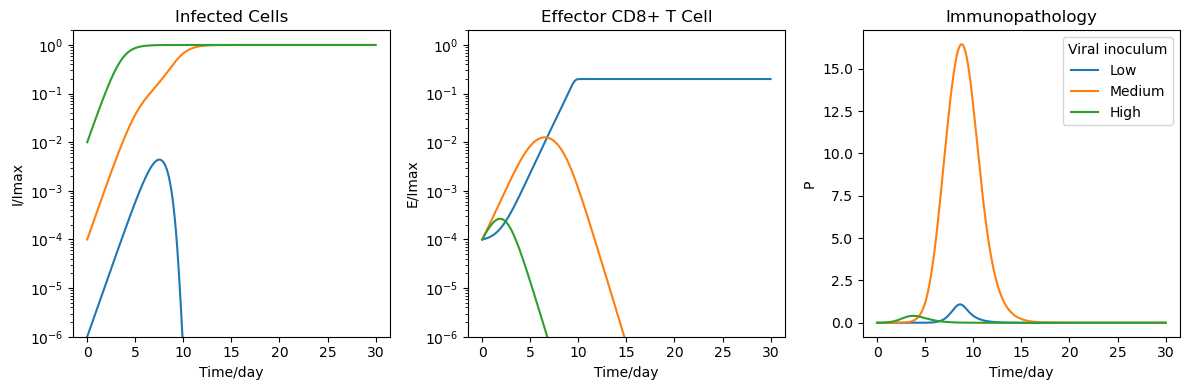

In [11]:
# your solution 2.1

# New RHS including the immunopathology term
def rhs2(u, t, k1, k2, k3, k4, Kp, Ke, alpha, dc):
    I, E, P = u
    dIdt = k1*I*(1 - I) - k2*I*E
    dEdt = k3*(I*E)/(Kp + I) - k4*(I*E)/(Ke + I)
    dPdt = alpha*I*E - dc*P
    
    return dIdt, dEdt, dPdt

# Parameters
Imax = 1e6
k1 = 1.3
k2 = Imax*5e-5
k3 = 1
k4 = 3

Kp = 10/Imax
Ke = 2e5/Imax

alpha = Imax**2*1e-8
dc = 1

# Initial conditions
IE0_vec = [[1e-6, 1e-4],
          [1e-4, 1e-4],
          [1e-2, 1e-4]]

tspan = np.linspace(0, 30, 501)

args = (k1, k2, k3, k4, Kp, Ke, alpha, dc)

# Solve trajectories and plot
p, ax = plt.subplots(1, 3, figsize=(12, 4))

labels = ["Low", "Medium", "High"]
for j, (I0, E0) in enumerate(IE0_vec):
    sol = odeint(rhs2, [I0, E0, 0], tspan, args)
    for i in range(3):
        ax[i].plot(tspan, sol[:, i], label=labels[j])
        ax[i].set_xlabel("Time/day")
        
ax[0].set_yscale("log")
ax[0].set_ylim(1e-6, 2)
ax[0].set_ylabel("I/Imax")
ax[0].set_title("Infected Cells")
ax[1].set_yscale("log")
ax[1].set_ylim(1e-6, 2)
ax[1].set_ylabel("E/Imax")
ax[1].set_title("Effector CD8+ T Cell")
ax[2].set_ylabel("P")
ax[2].set_title("Immunopathology")
ax[2].legend(title="Viral inoculum")

plt.tight_layout()
plt.show()

__2.2 (1')__ Assume that the host dies of immunopathology if and only if the system reaches threshold $P = 10$. 
Which of the three viral inoculum kills the host?

__Edit this cell to include your answer__

Medium

## Part 3 Reversing Viral Persistence

With one of the viral inocula the system hugs the __separatrix__ all the way to very close to the __saddle point__ until it commits to one of the fates.
This dynamical system's view explains why such initial condition gives high infected cell-CD8 T cell interaction for a long time and,
thus, high immunopathology.

In this part we are interested in numerically finding the separatrix between the basins of attraction for clearance and persistence.
How? Mathematically speaking, if a system starts right on the separatrix, it will travel along the separatrix until it hits the saddle and stays there forever
(this will never happen biologically due to noise).
For this reason, the separatrix is also the __stable manifold__ of the saddle.

Conversely, if the system starts right on an __unstable manifold__ of the saddle, it will travel away from the saddle.
Let's first find the unstable manifold by integrating from a pair of initial conditions right next to the saddle.

The saddle point is at

$$
\begin{align}
I_{saddle} &= \frac{k_3 K_e - k_4 K_p}{k_4 - k_3}\\
E_{saddle} &= \frac{k_1}{k_2}(1 - I_{saddle})
\end{align}
$$

__3.1 (1') Unstable manifolds.__ 

Integrate the system from a pair of initial conditions, $(I_{saddle} \pm 10^{-6}, E_{saddle})$.
Plot the trajectories in the phase plane. These are (approximately) the unstable manifolds of the saddle point.
Mark the saddle point with a big dot.

You don't have to include the nullclines. Use a _log scale_ for both axes and limit them between $1\times10^{-7}$ and 2.

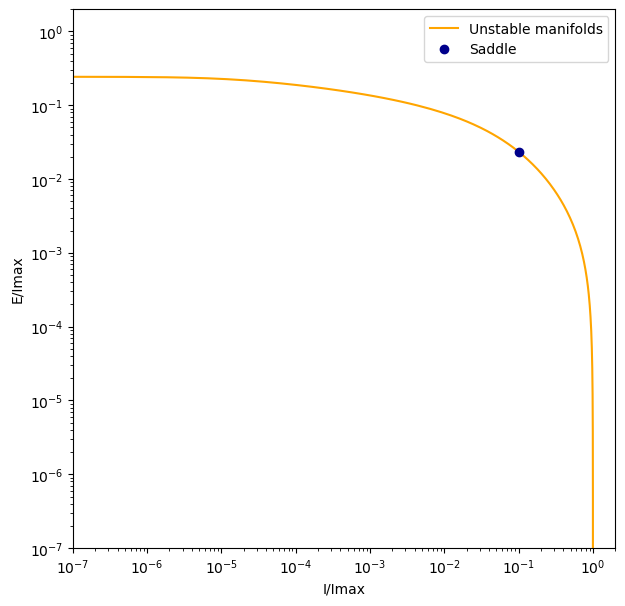

In [12]:
# your solution 3.1

p, ax = plt.subplots(figsize=(7, 7))

I_saddle = (k3*Ke - k4*Kp)/(k4 - k3)
E_saddle = k1/k2*(1 - I_saddle)

# Trajectories
IE0_vec = [[I_saddle - 1e-6, E_saddle], [I_saddle + 1e-6, E_saddle]]

tspan = np.linspace(0, 30, 501)

args = (k1, k2, k3, k4, Kp, Ke)

for i, u0 in enumerate(IE0_vec):
    sol = odeint(rhs, u0, tspan, args)
    if i == 0:
        ax.plot(sol[:, 0], sol[:, 1], color="orange", label="Unstable manifolds")
    else:
        ax.plot(sol[:, 0], sol[:, 1], color="orange", label=None)

# Saddle point
ax.plot([I_saddle], [E_saddle], 'o', color="darkblue", label = "Saddle")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-7, 2)
ax.set_ylim(1e-7, 2)
ax.set_xlabel("I/Imax")
ax.set_ylabel("E/Imax")
plt.legend()
plt.show()

__3.2 (2') Stable manifolds.__ If one runs time backwards, a system starting right on the __stable manifold__ would travel away from the saddle.

Use initial condition $(I_{saddle}, E_{saddle} \pm 10^{-6})$, boldly integrate from time = 0 to -30. 
The trajectories are the stable manifolds. Plot them together with the unstable manifolds. Label which are the stable and unstable ones.

__Tip:__ There may be numerical instability when integrating backward in time, in which case try to use a shorter time span to limit the propagation of errors.

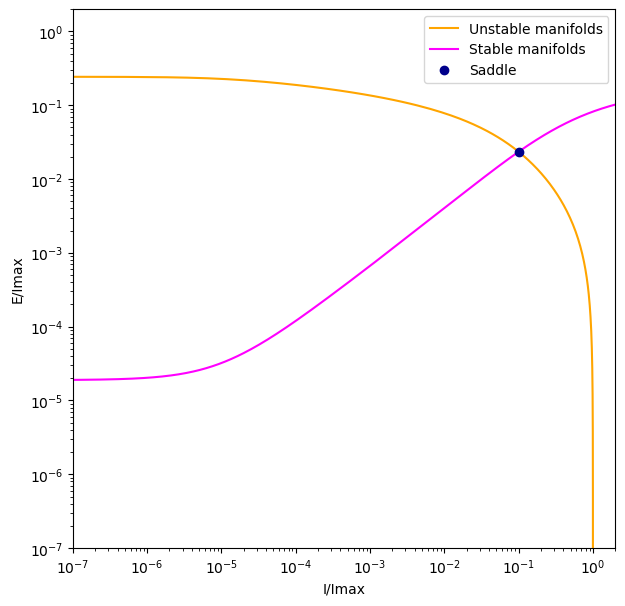

In [13]:
# your solution 3.2

p, ax = plt.subplots(figsize=(7, 7))

I_saddle = (k3*Ke - k4*Kp)/(k4 - k3)
E_saddle = k1/k2*(1 - I_saddle)

# Tuple of parameters
args = (k1, k2, k3, k4, Kp, Ke)

# Unstable manifolds
IE0_vec = [[I_saddle - 1e-6, E_saddle], [I_saddle + 1e-6, E_saddle]]

tspan = np.linspace(0, 30, 501)

for i, u0 in enumerate(IE0_vec):
    sol = odeint(rhs, u0, tspan, args)
    if i == 0:
        ax.plot(sol[:, 0], sol[:, 1], color="orange", label="Unstable manifolds")
    else:
        ax.plot(sol[:, 0], sol[:, 1], color="orange", label=None)

# Stable manifolds
IE0_vec = [[I_saddle, E_saddle - 1e-6], [I_saddle, E_saddle + 1e-6]]

tspan = np.linspace(0, -30, 1001)    # Run time backwards!
sol = odeint(rhs, IE0_vec[0], tspan, args)
ax.plot(sol[:, 0], sol[:, 1], color="magenta", label="Stable manifolds")

tspan = np.linspace(0, -11.5, 1001)
sol = odeint(rhs, IE0_vec[1], tspan, args)
ax.plot(sol[:, 0], sol[:, 1], color="magenta", label=None)

# Saddle point
ax.plot([I_saddle], [E_saddle], 'o', color="darkblue", label = "Saddle")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-7, 2)
ax.set_ylim(1e-7, 2)
ax.set_xlabel("I/Imax")
ax.set_ylabel("E/Imax")
plt.legend()
plt.show()

__3.3 (2')__ Reuse your 1.5 code to overlay some trajectories onto the manifolds plot. You don't have to include the time space plots.
The plot should capture the essence of Fig. 1B.

The stable and unstable manifolds cut the I-E plane into four quadrants.
Based on the plot, which of the quadrants are the basin of attraction for the _clearance_ outcome? Where is the separatrix?

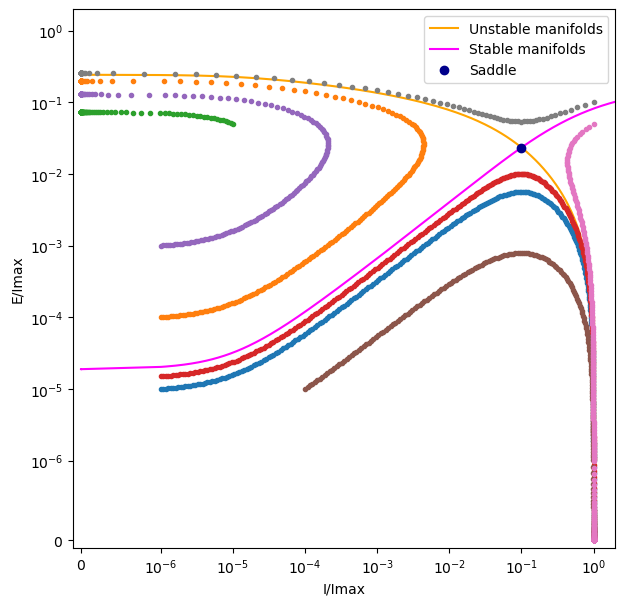

In [14]:
# your solution 3.3

p, ax = plt.subplots(figsize=(7, 7))

I_saddle = (k3*Ke - k4*Kp)/(k4 - k3)
E_saddle = k1/k2*(1 - I_saddle)

# Tuple of parameters
args = (k1, k2, k3, k4, Kp, Ke)

# Unstable manifolds
IE0_vec = [[I_saddle - 1e-6, E_saddle], [I_saddle + 1e-6, E_saddle]]

tspan = np.linspace(0, 30, 501)

for i, u0 in enumerate(IE0_vec):
    sol = odeint(rhs, u0, tspan, args)
    if i == 0:
        ax.plot(sol[:, 0], sol[:, 1], color="orange", label="Unstable manifolds")
    else:
        ax.plot(sol[:, 0], sol[:, 1], color="orange", label=None)

# Stable manifolds
IE0_vec = [[I_saddle, E_saddle - 1e-6], [I_saddle, E_saddle + 1e-6]]

tspan = np.linspace(0, -30, 1001)    # Run time backwards!
sol = odeint(rhs, IE0_vec[0], tspan, args)
ax.plot(sol[:, 0], sol[:, 1], color="magenta", label="Stable manifolds")

tspan = np.linspace(0, -11.5, 1001)
sol = odeint(rhs, IE0_vec[1], tspan, args)
ax.plot(sol[:, 0], sol[:, 1], color="magenta", label=None)

# Saddle point
ax.plot([I_saddle], [E_saddle], 'o', color="darkblue", label = "Saddle")

# Example trajectories
IE0_vec = [[1e-6, 1e-5],
           [1e-6, 1e-4],
           [1e-5, 0.05],
           [1e-6, 1.5e-5],
           [1e-6, 1e-3],
           [1e-4, 1e-5],
           [1, 0.05],
           [1, 0.1]]

tspan = np.linspace(0, 30, 501)

for i, u0 in enumerate(IE0_vec):
    sol = odeint(rhs, u0, tspan, args)
    ax.plot(sol[:, 0], sol[:, 1], '.')

ax.set_xscale("symlog", linthresh=1e-6)
ax.set_yscale("symlog", linthresh=1e-6)
ax.set_xlim(-1e-7, 2)
ax.set_ylim(-1e-7, 2)
ax.set_xlabel("I/Imax")
ax.set_ylabel("E/Imax")
plt.legend()
plt.show()

__Edit this cell to include your answer__

The two quadrants above the stable manifolds.

The stable manifolds are the separatrix.

__3.4 (2')__ Change $k_3$ to 1.5. This models increse in CD8 T cell activation by antigens.

Plot the new stable and unstable manifolds
together with the original ones. Draw the original ones as dashed lines.

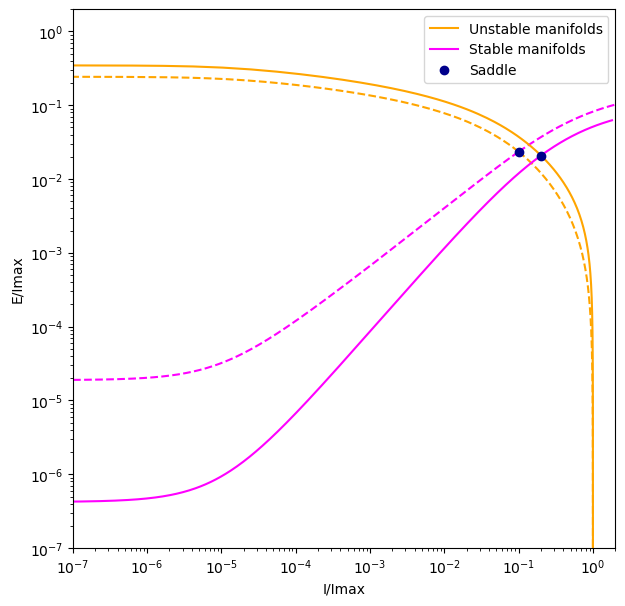

In [15]:
# your solution 3.4

p, ax = plt.subplots(figsize=(7, 7))

##########
# Original k3
#########

# Tuple of parameters
k3 = 1
args = (k1, k2, k3, k4, Kp, Ke)

I_saddle = (k3*Ke - k4*Kp)/(k4 - k3)
E_saddle = k1/k2*(1 - I_saddle)

# Unstable manifolds
IE0_vec = [[I_saddle - 1e-6, E_saddle], [I_saddle + 1e-6, E_saddle]]

tspan = np.linspace(0, 30, 501)

for i, u0 in enumerate(IE0_vec):
    sol = odeint(rhs, u0, tspan, args)
    ax.plot(sol[:, 0], sol[:, 1], color="orange", linestyle="dashed")

# Stable manifolds
IE0_vec = [[I_saddle, E_saddle - 1e-6], [I_saddle, E_saddle + 1e-6]]

tspan = np.linspace(0, -30, 1001)    # Run time backwards!
sol = odeint(rhs, IE0_vec[0], tspan, args)
ax.plot(sol[:, 0], sol[:, 1], color="magenta", linestyle="dashed")

tspan = np.linspace(0, -11.5, 1001)
sol = odeint(rhs, IE0_vec[1], tspan, args)
ax.plot(sol[:, 0], sol[:, 1], color="magenta", linestyle="dashed")

# Saddle point
ax.plot([I_saddle], [E_saddle], 'o', color="darkblue")

##########
# New k3
#########

# Tuple of parameters
k3_new = 1.5
args = (k1, k2, k3_new, k4, Kp, Ke)

I_saddle = (k3_new*Ke - k4*Kp)/(k4 - k3_new)
E_saddle = k1/k2*(1 - I_saddle)

# Unstable manifolds
IE0_vec = [[I_saddle - 1e-6, E_saddle], [I_saddle + 1e-6, E_saddle]]

tspan = np.linspace(0, 30, 501)

for i, u0 in enumerate(IE0_vec):
    sol = odeint(rhs, u0, tspan, args)
    if i == 0:
        ax.plot(sol[:, 0], sol[:, 1], color="orange", label="Unstable manifolds")
    else:
        ax.plot(sol[:, 0], sol[:, 1], color="orange", label=None)

# Stable manifolds
IE0_vec = [[I_saddle, E_saddle - 1e-6], [I_saddle, E_saddle + 1e-6]]

tspan = np.linspace(0, -30, 1001)    # Run time backwards!
sol = odeint(rhs, IE0_vec[0], tspan, args)
ax.plot(sol[:, 0], sol[:, 1], color="magenta", label="Stable manifolds")

tspan = np.linspace(0, -10.5, 1001)
sol = odeint(rhs, IE0_vec[1], tspan, args)
ax.plot(sol[:, 0], sol[:, 1], color="magenta", label=None)

# Saddle point
ax.plot([I_saddle], [E_saddle], 'o', color="darkblue", label = "Saddle")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-7, 2)
ax.set_ylim(1e-7, 2)
ax.set_xlabel("I/Imax")
ax.set_ylabel("E/Imax")
plt.legend()
plt.show()

__3.5 (1')__ With the original parameters, if a system starts close enough to the stable manifold (but not squrely on it), what will be its fate?

Starting from the same initial condition, what will be its new fate with the new parameter?

__Edit this cell to include your answer__

With the original parameters, it can go either to the clearance state or the persistence state.

Now, it will go to the clearance state.

This answer ignores immunopathology. If the student says that the host will be killed by immunopathology in the original model
but the immunopathology is alleviated with the new parameter, that's also correct.

__3.6 (Bonus points 3') Innate Immnune Response.__

In later part of the paper the authors keep building onto the minimal motif with innate immune response

![The original 2D model](https://github.com/yuja-liu/bios20236_2024/blob/main/lab7/figs/innate_immune_response.png?raw=true)

(Baral et al. 2019 Fig. 4A)

Which is described by ODEs

$$
\begin{align}
\frac{dI}{dt} &= k_1 \left( 1 - \epsilon\frac{X}{\phi_X + X}\right) I (1 - I) - k_2 I E\\
\frac{dE}{dt} &= k_3 \frac{I E}{K_p + I} - k_4 \frac{I E}{K_e + I}\\
\frac{dX}{dt} &= k_6 \left(\frac{I}{\phi_I + I} - X\right)
\end{align}
$$

Which admits a saddle point at

$$
\begin{align}
I_{saddle} &= \frac{k_3 K_e - k_4 K_p}{k_4 - k_3}\\
E_{saddle} &= \frac{k_1}{k_2}\left( 1 - \epsilon\frac{X_{saddle}}{\phi_X + X_{saddle}}\right)(1 - I_{saddle})\\
X_{saddle} &= \frac{I_{saddle}}{\phi_I + I_{saddle}}
\end{align}
$$

Numerically solve the stable and unstable manifolds of the saddle point and project the manifolds on the I-E plane.
Overlay the stable and unstable manifolds of the original model in dashed lines.

Use these additional parameters (keep other parameters the same as in Task 3.1):

$$
\begin{gather}
k_6 = 10\\
\phi_I = 2000/I_{max}\\
\phi_X = 0.8\\
\epsilon = 0.3
\end{gather}
$$

__Hints:__ 
1) There may be numerical instability when integrating backward in time starting from very close to the saddle.
Try to start a bit further away from the saddle.
2) `scipy.integrate.solve_ivp` ([more on it](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)) provides a suite of ODE solvers, some of them better at solving _stiff_ problems than the `odeint` function.
You can try them out if instability persists.

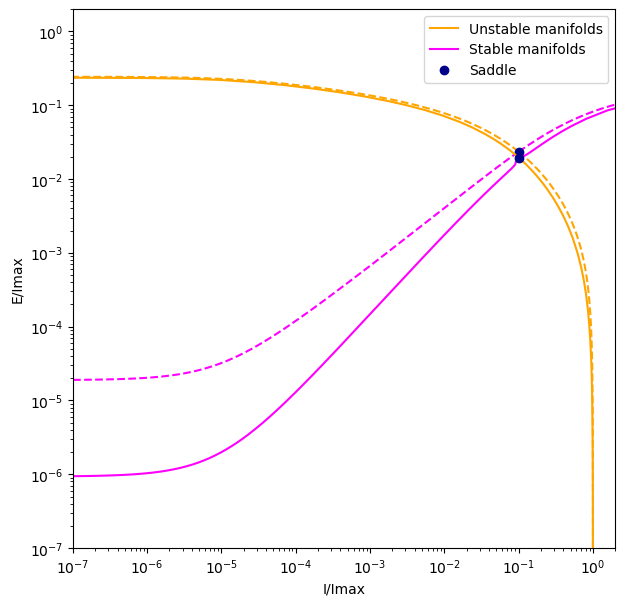

In [17]:
# your solution 3.6

from scipy.integrate import solve_ivp

p, ax = plt.subplots(figsize=(7, 7))

##########
# Original model
#########

# Tuple of parameters
k3 = 1
args = (k1, k2, k3, k4, Kp, Ke)

I_saddle = (k3*Ke - k4*Kp)/(k4 - k3)
E_saddle = k1/k2*(1 - I_saddle)

# Unstable manifolds
IE0_vec = [[I_saddle - 1e-6, E_saddle], [I_saddle + 1e-6, E_saddle]]

tspan = np.linspace(0, 30, 501)

for i, u0 in enumerate(IE0_vec):
    sol = odeint(rhs, u0, tspan, args)
    ax.plot(sol[:, 0], sol[:, 1], color="orange", linestyle="dashed")

# Stable manifolds
IE0_vec = [[I_saddle, E_saddle - 1e-6], [I_saddle, E_saddle + 1e-6]]

tspan = np.linspace(0, -30, 1001)    # Run time backwards!
sol = odeint(rhs, IE0_vec[0], tspan, args)
ax.plot(sol[:, 0], sol[:, 1], color="magenta", linestyle="dashed")

tspan = np.linspace(0, -11.5, 1001)
sol = odeint(rhs, IE0_vec[1], tspan, args)
ax.plot(sol[:, 0], sol[:, 1], color="magenta", linestyle="dashed")

# Saddle point
ax.plot([I_saddle], [E_saddle], 'o', color="darkblue")

##########
# With innate immune response
#########

def rhs_innate(t, u, epsilon, k1, k2, k3, k4, k6, Kp, Ke, phiX, phiI):
    I, E, X = u
    dIdt = k1*(1 - epsilon*X/(phiX + X))*I*(1 - I) - k2*I*E
    dEdt = k3*(I*E)/(Kp + I) - k4*(I*E)/(Ke + I)
    dXdt = k6*(I/(phiI + I) - X)
    
    return dIdt, dEdt, dXdt

# Tuple of parameters

k6 = 10
phiI = 2000/Imax
phiX = 0.8
epsilon = 0.3

args = (epsilon, k1, k2, k3, k4, k6, Kp, Ke, phiX, phiI)

I_saddle = (k3*Ke - k4*Kp)/(k4 - k3)
X_saddle = I_saddle/(phiI + I_saddle)
E_saddle = k1/k2*(1 - epsilon*X_saddle/(phiX + X_saddle))*(1 - I_saddle)

# Unstable manifolds
IEX0_vec = [[I_saddle - 1e-6, E_saddle, X_saddle], [I_saddle + 1e-6, E_saddle, X_saddle]]

tspan = (0, 30)

for i, u0 in enumerate(IEX0_vec):
    sol = solve_ivp(rhs_innate, tspan, u0, args=args)
    if i == 0:
        ax.plot(sol.y[0, :], sol.y[1, :], color="orange", label="Unstable manifolds")
    else:
        ax.plot(sol.y[0, :], sol.y[1, :], color="orange", label=None)

# Stable manifolds
from scipy.integrate import solve_ivp

IEX0_vec = [[I_saddle - 0.002, E_saddle - 0.002, X_saddle], [I_saddle, E_saddle + 1e-6, X_saddle]]

tspan = (0, -30)

sol = solve_ivp(rhs_innate, tspan, IEX0_vec[0], args=args, method="BDF")
ax.plot(sol.y[0, :], sol.y[1, :], color="magenta", label="Stable manifolds")

sol = solve_ivp(rhs_innate, tspan, IEX0_vec[1], args=args)
ax.plot(sol.y[0, :], sol.y[1, :], color="magenta", label=None)

# Saddle point
ax.plot([I_saddle], [E_saddle], 'o', color="darkblue", label = "Saddle")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-7, 2)
ax.set_ylim(1e-7, 2)
ax.set_xlabel("I/Imax")
ax.set_ylabel("E/Imax")
plt.legend()
plt.show()

I hope that you feel encouraged by how much of this PNAS paper YOU can reproduce just with the techniques that you've developed in the lab sessions
and the knowledge you've learned in class.

Congratulations! You've reached the end of Labs. I hope that you learned something and had some fun!